In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from os import listdir
import re

from PIL import Image

In [2]:
# get all file names
path = 'w_seconds'
files = [f for f in listdir(path) if f[-4:]=='.png']
# load one to get the dimensions
image = mpimg.imread(f'{path}/{files[0]}')
# get dimensions
shape = list(image.shape)
# remove alpha if necessary
if (shape[2]==4):
    shape[2] = 3
n = len(files)
n

10000

In [3]:
y = np.zeros(shape=(n,2),dtype=int)
X = np.zeros(shape=(n,*shape))
for i in range(len(files)):
    # get the hour from the file name
    y[i,0] = re.search('^([0-9]*)_([0-9]*)',files[i])[1]
    y[i,1] = re.search('^([0-9]*)_([0-9]*)',files[i])[2]
    # get the pixels, remove the alpha if needed and convert to 0-255
    X[i] = (mpimg.imread(f'{path}/{files[i]}')[:,:,:shape[2]] )

In [4]:
# transform y to label encoded
temp = y.copy()
y = np.zeros(shape=(n,24),dtype=int)
for i in range(n):
    # hours, 0 to 11 for 1 to 12
    h = temp[i,0] -1
    # minutes 12 to 23 for 0 to 55
    m = temp[i,1]//5 + 12
    y[i,h] = 1
    y[i,m] = 1

6_55_clock_8702.png
6 55
[0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1]


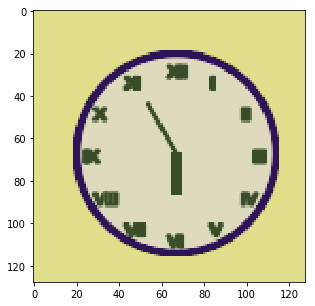

In [5]:
i = np.random.randint(0,n)
print(files[i])
print(temp[i,0],temp[i,1])
print(y[i,:12])
print(y[i,12:])
plt.figure(figsize=(5,5))
plt.imshow(X[i])
plt.show()

In [6]:
p = 0.9
c = int(len(X) * p)

X_train = X[:c]
y_train = y[:c]

X_test = X[c:]
y_test = y[c:]

In [7]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

Using TensorFlow backend.


In [8]:
input_layer = Input(shape=shape)
conv1 = Convolution2D(18, kernel_size=3,activation='relu')(input_layer)
conv2 = Convolution2D(36, kernel_size=3,activation='relu')(conv1)
pool = MaxPooling2D()(conv2)
hidden = Dense(128,activation='relu')(Flatten()(pool))
drop = Dropout(rate=0.5)(hidden)
output1 = Dense(12, activation='softmax')(drop)
output2 = Dense(12, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=[output1, output2])
model.compile(optimizer='adam', loss=['categorical_crossentropy', 'categorical_crossentropy'],
              metrics=['accuracy'], loss_weights=[1., 1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.fit(X_train, [y_train[:,:12],y_train[:,12:]],
          epochs=40,
          batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
9000/9000 [==============================] - 863s 96ms/step - loss: 4.9656 - dense_2_loss: 2.5646 - dense_3_loss: 2.4009 - dense_2_acc: 0.1204 - dense_3_acc: 0.1980
Epoch 2/40
9000/9000 [==============================] - 959s 107ms/step - loss: 3.6150 - dense_2_loss: 2.0349 - dense_3_loss: 1.5801 - dense_2_acc: 0.3056 - dense_3_acc: 0.4661
Epoch 3/40
9000/9000 [==============================] - 832s 92ms/step - loss: 1.7895 - dense_2_loss: 0.9240 - dense_3_loss: 0.8655 - dense_2_acc: 0.6873 - dense_3_acc: 0.7059
Epoch 4/40
9000/9000 [==============================] - 774s 86ms/step - loss: 0.8798 - dense_2_loss: 0.4415 - dense_3_loss: 0.4383 - dense_2_acc: 0.8529 - dense_3_acc: 0.8527
Epoch 5/40
9000/9000 [==============================] - 787s 87ms/step - loss: 0.5302 - dense_2_loss: 0.2797 - dense_3_loss: 0.2505 - dense_2_acc: 0.9033 - dense_3_acc: 0.9163
Epoch 6/40
9000/9000 [==============================] - 772s 86ms/step 

In [12]:
model.evaluate(X_test, [y_test[:,:12],y_test[:,12:]], batch_size=10)

1000/1000 [==============================] - 11s 11ms/step


[0.901387055878131,
 0.6318402010436148,
 0.269546859443044,
 0.9039999914169311,
 0.9599999934434891]

In [13]:
path = 'google_images'
files = listdir(path)
len(files)

41

(128, 128, 3)


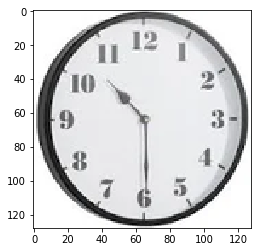

12:0
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 128, 3)


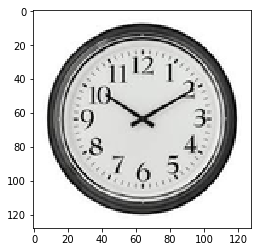

10:10
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 128, 3)


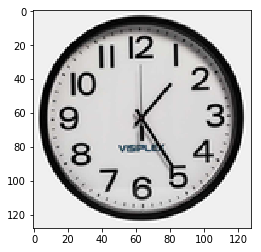

9:25
[array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 128, 3)


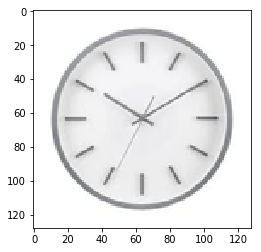

9:15
[array([[2.9716254e-27, 1.6231998e-12, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32), array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.1583815e-27, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)]
(128, 128, 3)


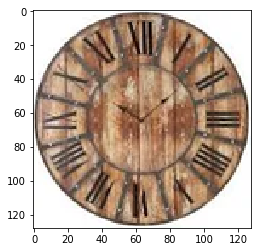

6:40
[array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32), array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.410701e-28, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00]],
      dtype=float32)]
(128, 120, 3)
5
(128, 128, 3)


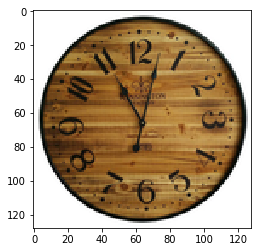

9:55
[array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)]
(128, 128, 3)


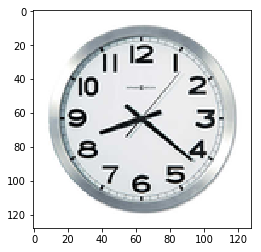

4:20
[array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 128, 4)
8
(128, 126, 3)
9
(128, 128)
10
(128, 103, 3)
11
(128, 128, 3)


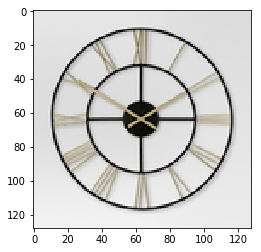

4:15
[array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 128, 3)


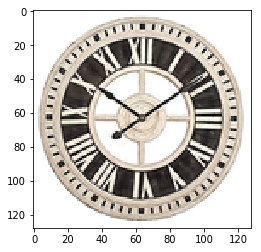

10:10
[array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.0879679e-14, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 128, 3)


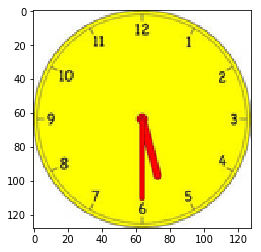

4:45
[array([[0.000000e+00, 2.094317e-37, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00]],
      dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)]
(128, 128, 3)


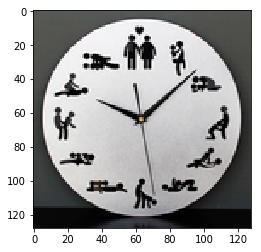

10:10
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(85, 128, 3)
16
(128, 128, 3)


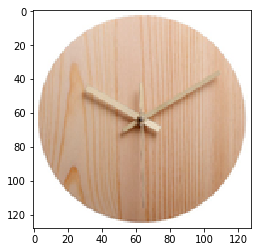

1:45
[array([[1.0000000e+00, 6.2262721e-29, 4.0524617e-26, 7.5435770e-34,
        3.0047758e-18, 3.0934649e-22, 1.7180967e-24, 9.7463792e-33,
        6.2174953e-20, 5.8951140e-23, 2.0072824e-10, 6.5620005e-20]],
      dtype=float32), array([[3.0643189e-24, 3.2343162e-26, 1.1996419e-18, 7.3171635e-28,
        6.2031018e-22, 1.6175322e-09, 7.8048958e-30, 1.1263576e-18,
        1.6176079e-22, 9.9998736e-01, 6.7352033e-29, 1.2617676e-05]],
      dtype=float32)]
(96, 128, 3)
18
(128, 128, 3)


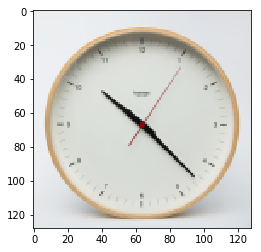

3:50
[array([[0.0000000e+00, 0.0000000e+00, 9.9980146e-01, 0.0000000e+00,
        8.5628239e-23, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.9861857e-04, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)]
(128, 128, 3)


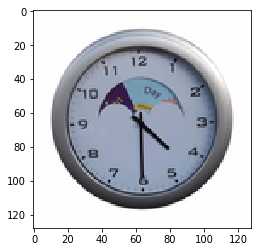

4:20
[array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 109, 3)
21
(85, 128, 3)
22
(98, 128, 3)
23
(128, 128, 3)


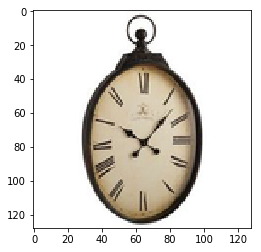

9:35
[array([[1.9294848e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 7.0352363e-38, 0.0000000e+00]],
      dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)]
(128, 128)
25
(127, 128)
26
(128, 128, 3)


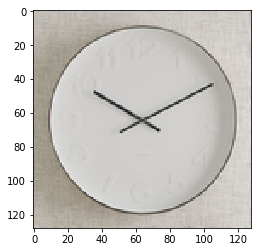

4:50
[array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)]
(128, 128, 3)


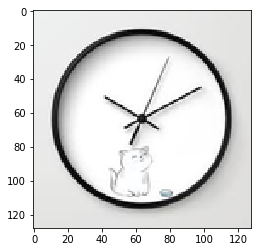

9:40
[array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)]
(128, 128, 3)


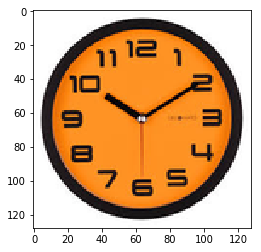

6:10
[array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 128, 4)
30
(128, 128, 3)


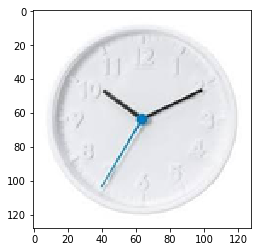

10:10
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(96, 128, 3)
32
(128, 105, 3)
33
(128, 128, 3)


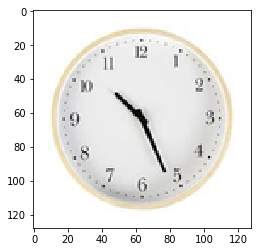

9:25
[array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 128, 3)


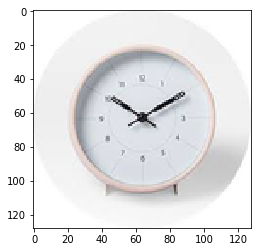

10:10
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(128, 128, 3)


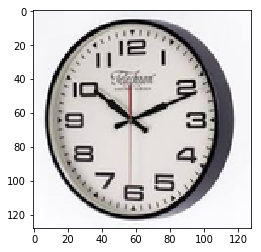

3:10
[array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(91, 128, 3)
37
(128, 128, 3)


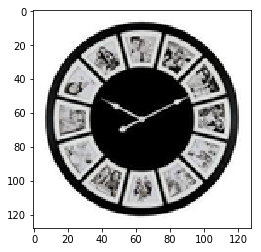

10:50
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)]
(128, 128, 3)


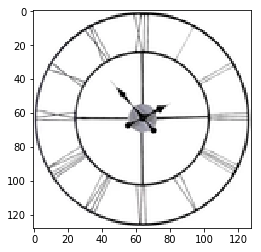

6:15
[array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]
(67, 128, 3)
40


In [15]:
for i in range(41):
    img = Image.open(path+'/'+files[i])
    img.thumbnail((128, 128), Image.ANTIALIAS) # resizes image in-place
    img = np.asarray(img)
    print(img.shape)
    if (img.shape[:3] == (128,128,3)):   
        imgplot = plt.imshow(img)
        plt.show()
        pred = model.predict(img.reshape(1,128,128,3))
        h = np.argmax(pred[0])+1
        m = np.argmax(pred[1])*5
        print(str(h)+":"+str(m))
        print(pred)
    else:
        print(i)

In [16]:
model.save('270319.h5')